In [111]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Displaying every column 
pd.pandas.set_option('display.max_columns', None)

In [112]:
df = pd.read_csv("train.csv")

In [113]:
df.shape

(1460, 81)

In [114]:
#Checking out the top records
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Fixing features with Null Values

### Finding features with Null Values

In [115]:
features_with_na = []
for name in df.columns:
    if df[name].isnull().sum() > 1:
        features_with_na += [name]

In [116]:
#Features with missing values are as follows

features_with_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [117]:
# Finding percentage of NAN values

for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,2), "% missing")

LotFrontage 17.74 % missing
Alley 93.77 % missing
MasVnrType 0.55 % missing
MasVnrArea 0.55 % missing
BsmtQual 2.53 % missing
BsmtCond 2.53 % missing
BsmtExposure 2.6 % missing
BsmtFinType1 2.53 % missing
BsmtFinType2 2.6 % missing
FireplaceQu 47.26 % missing
GarageType 5.55 % missing
GarageYrBlt 5.55 % missing
GarageFinish 5.55 % missing
GarageQual 5.55 % missing
GarageCond 5.55 % missing
PoolQC 99.52 % missing
Fence 80.75 % missing
MiscFeature 96.3 % missing


Finding the percentage of NAN values in every feature.
It turns out that there are features where the percentage is very high, and hence it could have an impact on the final prediction.

### Exploring the impact.

We want to find out how the sales price changes with NAN values, or if it remains the same irrespective of the NAN values.

In [118]:
df_cpy = df.copy()
for feature in features_with_na:
    df_cpy[feature] = df_cpy[feature].isnull()

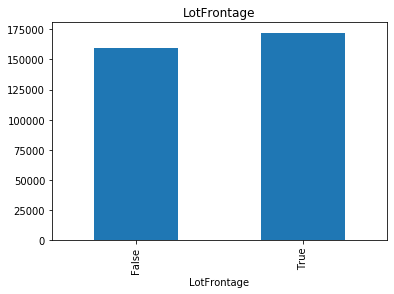

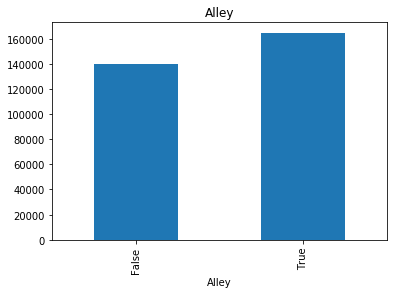

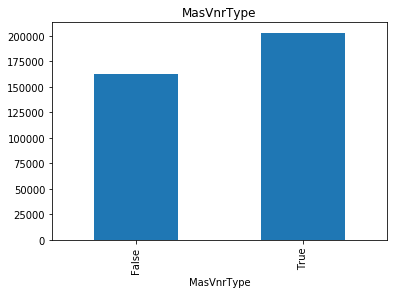

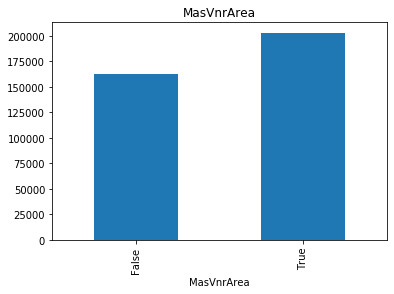

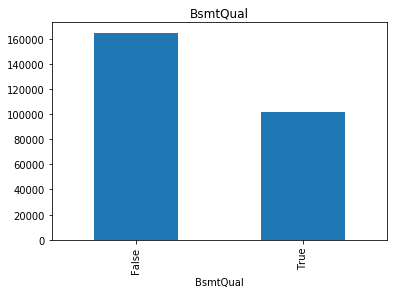

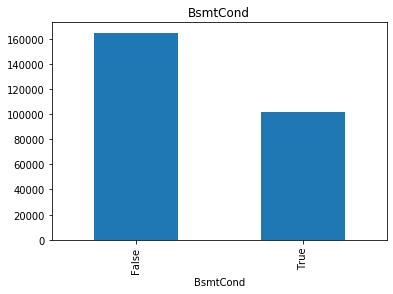

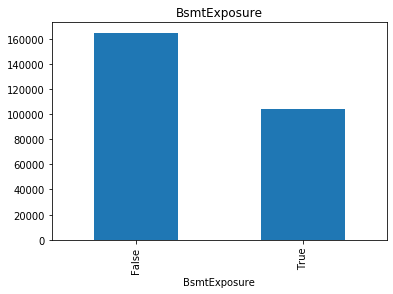

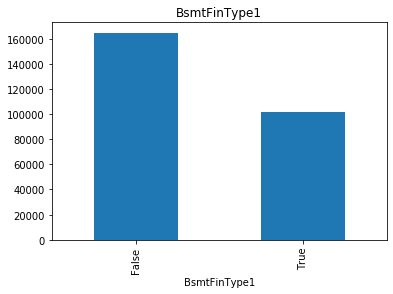

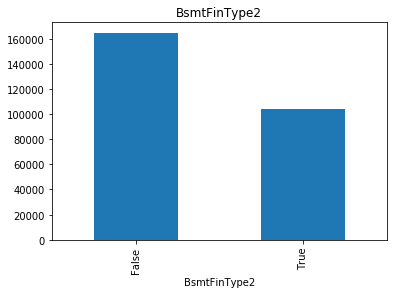

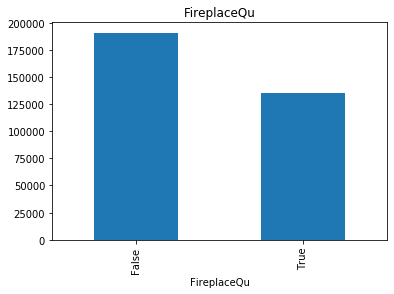

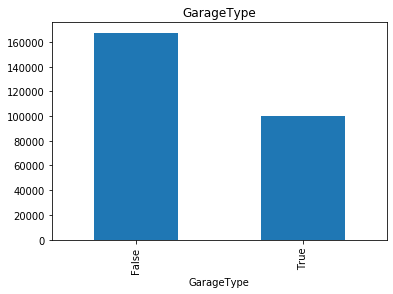

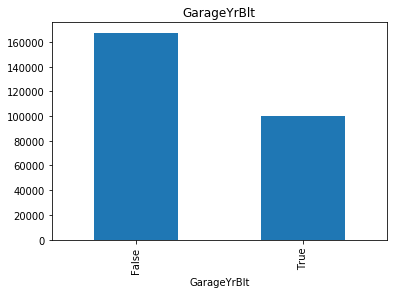

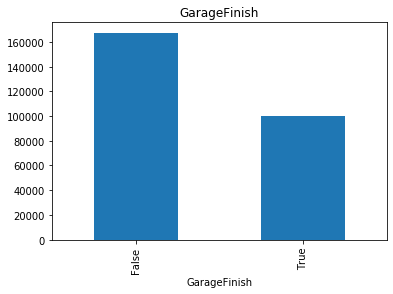

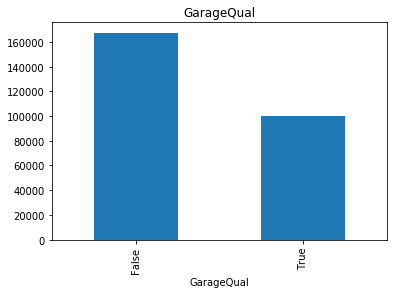

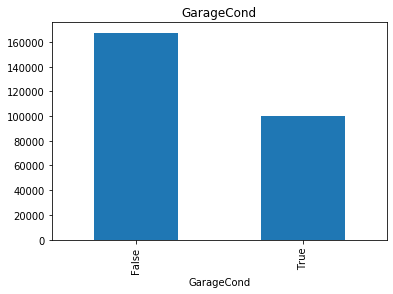

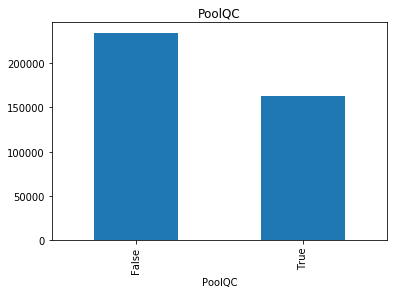

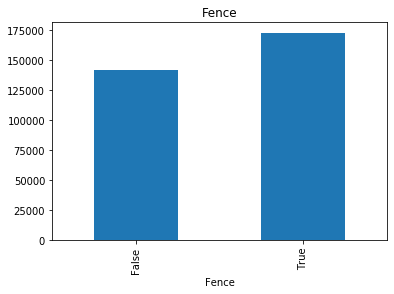

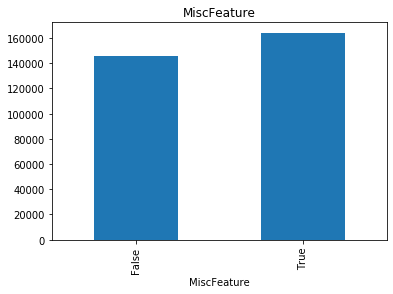

In [119]:
for feature in features_with_na:
        df_cpy.groupby(feature)["SalePrice"].median().plot.bar()
        plt.title(feature)
        plt.show()

**Observations**
- We see that a number of plots show a significant variation in the sales price with respect to the NAN values. Hence, carefully exploring the fix to this NAN value problem is required.


**TO DO LIST :**
- [ ] Fix the missing values with careful numerical precision



Also, as ID is unique and is tracked by pandas automatically, we don't need to keep the column.id anymore.

**TO DO LIST :**
- [ ] Fix the missing values with careful numerical precision
- [ ] Remove the id column



# Numerical Variables

### **Finding out the number of numerical features in total.**

In [120]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != "O"]
print(numerical_features)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [121]:
print("Number of numerical variables:", len(numerical_features))

Number of numerical variables: 38


**Finding out the number of temporal features** 

In [122]:
temporal_features = [feature for feature in df.columns if "Yr" in feature or "Year" in feature]

In [123]:
temporal_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

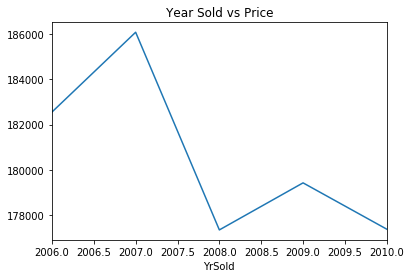

In [124]:
df.groupby("YrSold")["SalePrice"].mean().plot.line()
plt.title("Year Sold vs Price")
plt.show()

We see that the average price has decreased in the past years.

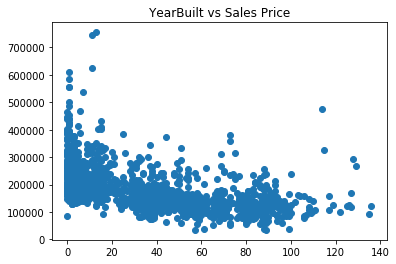

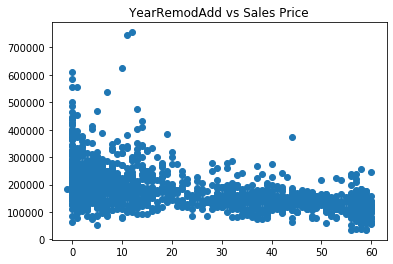

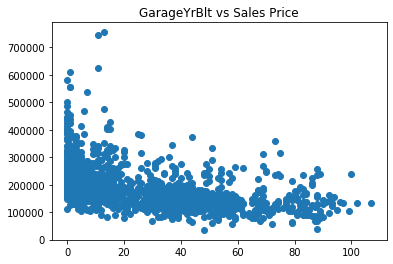

In [125]:
for feature in temporal_features: 
    if(feature != "YrSold"):
        plt.scatter((df.YrSold - df[feature]), df["SalePrice"])
        plt.title(feature + " vs Sales Price")
        plt.show()

**Observations**
- We see that a number of plots show a significant variation in the sales price with respect to the NAN values. Hence, carefully exploring the fix to this NAN value problem is required.
- We see that with the average house price has decreased over the last few years. 
- We see that for a house, on average, its price decreases with an increase in it's age, an increase in the number of years since the last remodelling, and an increase in it's garage's age 

**Checking the dependency of Sales Price on other features.**

Given the fact that we had numerical variables, we need to divide them into discrete and continuous variables as well. Lets first see how the sales prices depend upon different discrete variables. 

First, we determine the discrete variables.
The condition for doing that is that if a feature has less than 25 values distributed throughout the observations, we consider it to be discrete. 

In [126]:
discrete_features = [feature for feature in numerical_features 
                     if len(df[feature].unique()) <= 25 and feature not in ["Id"] + temporal_features]

In [127]:
discrete_features

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

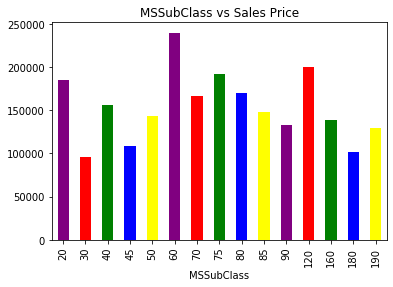

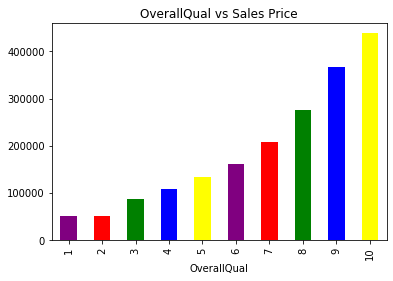

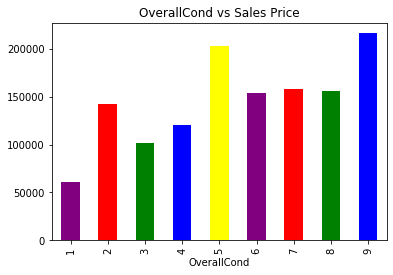

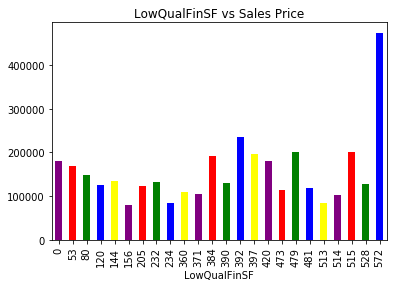

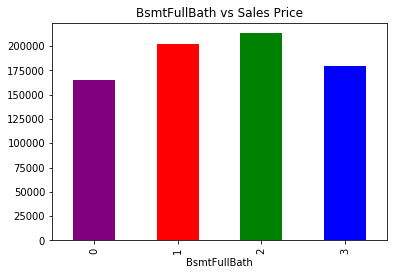

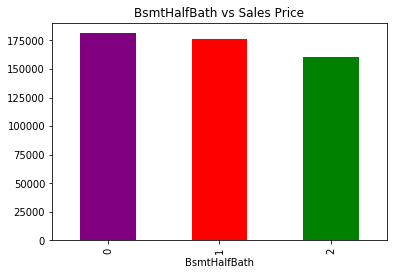

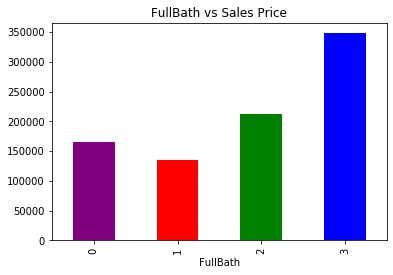

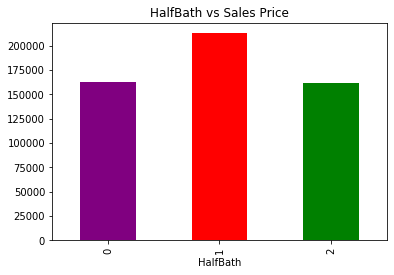

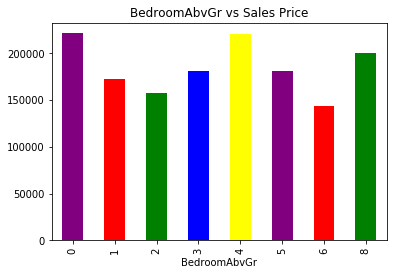

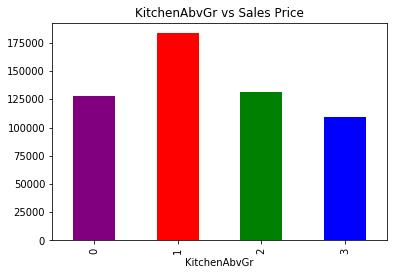

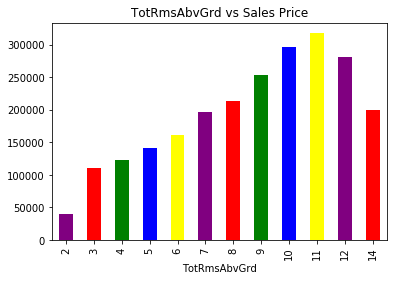

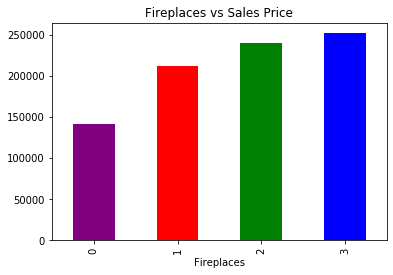

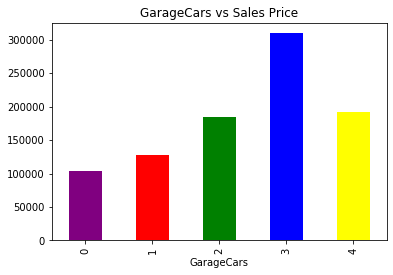

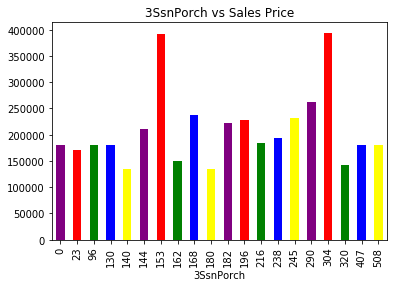

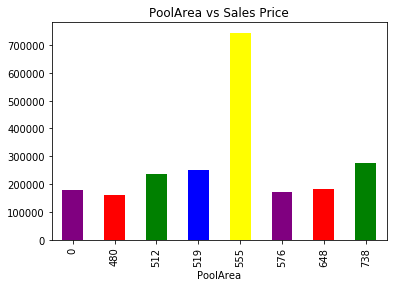

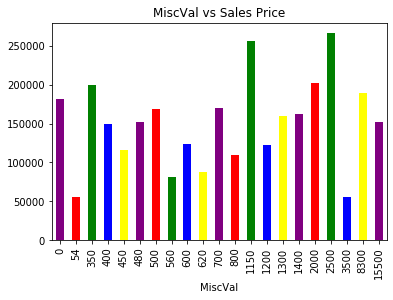

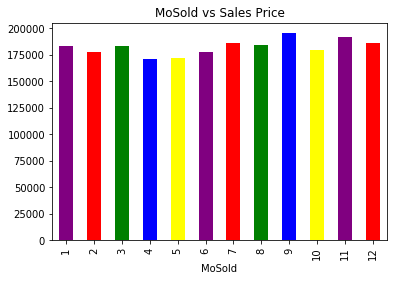

In [128]:
for feature in discrete_features:
    df.groupby(feature)["SalePrice"].mean().plot.bar(color = ['purple', 'red', 'green', 'blue', 'yellow'])
    plt.title(feature + " vs Sales Price")
    plt.show()

**Observations**
- We see that a number of plots show a significant variation in the sales price with respect to the NAN values. Hence, carefully exploring the fix to this NAN value problem is required.
- We see that with the average house price has decreased over the last few years. 
- We see that for a house, on average, its price decreases with an increase in it's age, an increase in the number of years since the last remodelling, and an increase in it's garage's age 
- One of the most obvious correlations we see that the sales price increases with an increase in overall quality score.

Lets determine the continuous variables

In [129]:
continuous_features = [feature for feature in numerical_features
                       if feature not in discrete_features + temporal_features + ["Id", "SalePrice"]] 

In [130]:
continuous_features

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch']

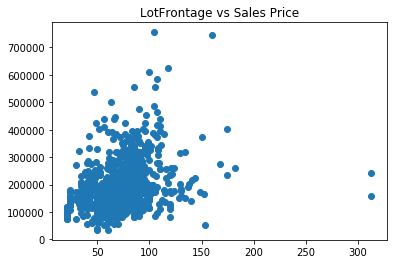

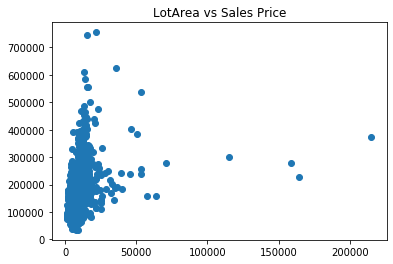

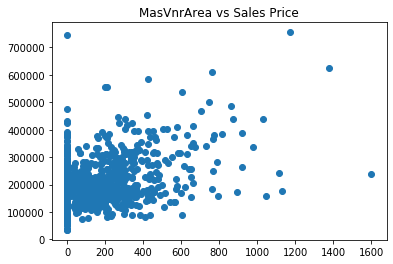

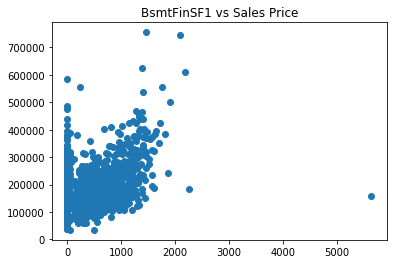

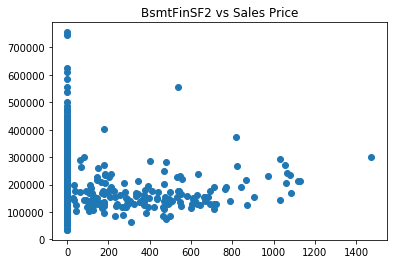

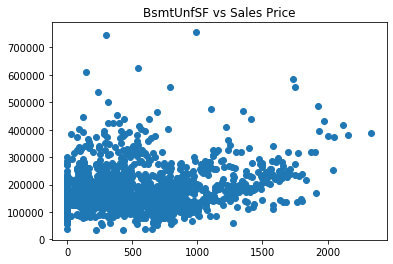

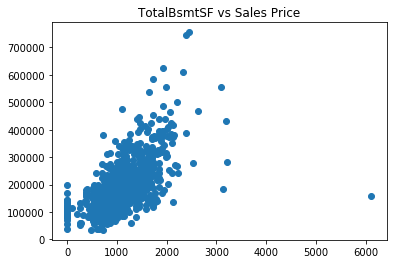

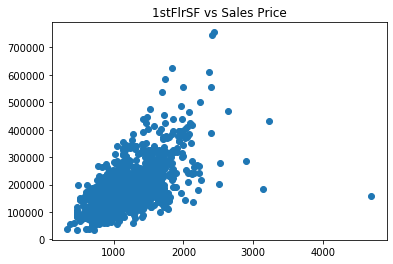

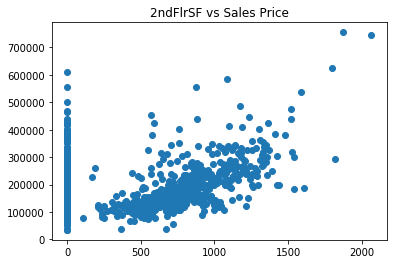

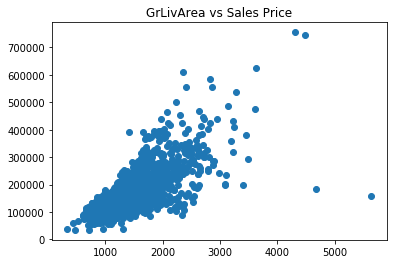

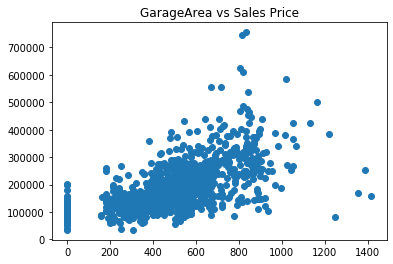

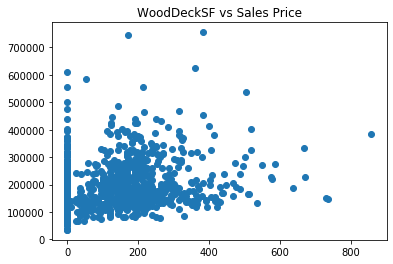

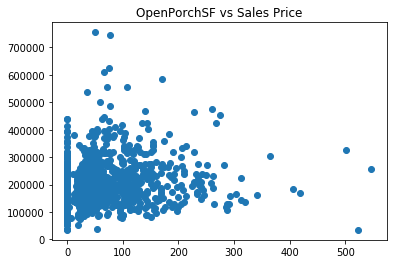

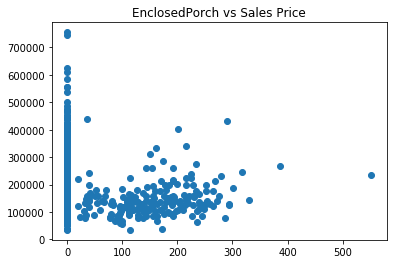

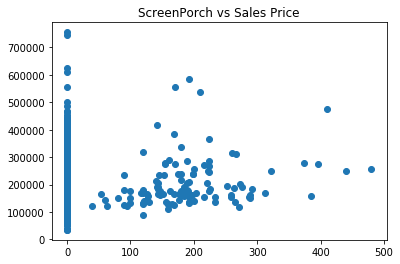

In [131]:
for feature in continuous_features:
    plt.scatter(df[feature],df.SalePrice)
    plt.title(feature + " vs Sales Price")
    plt.show()

Lets also check how these values are distributed.

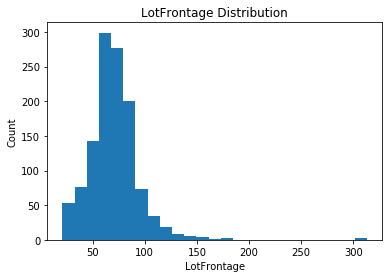

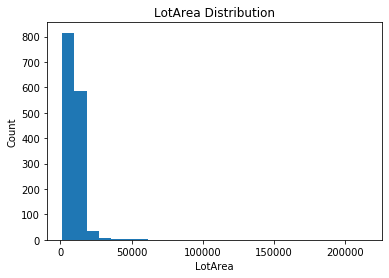

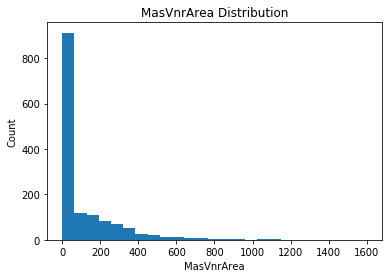

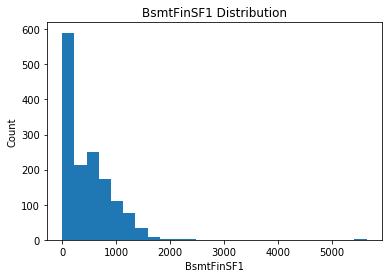

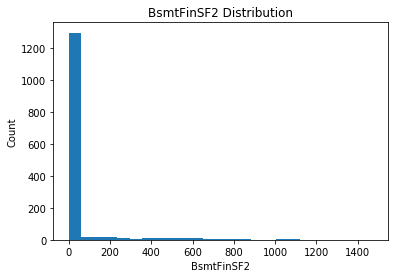

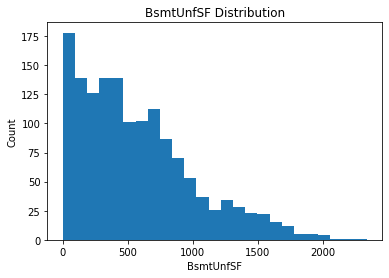

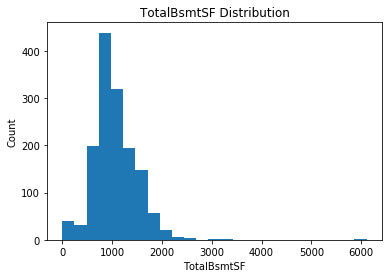

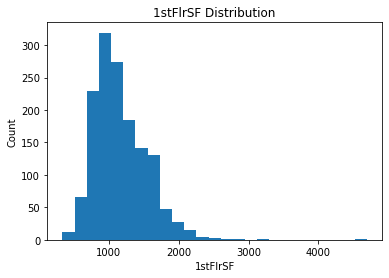

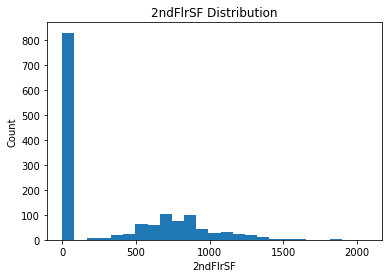

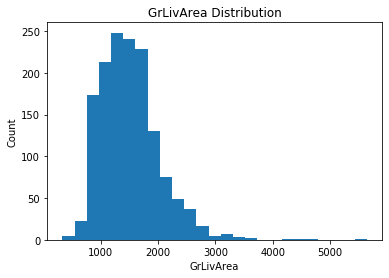

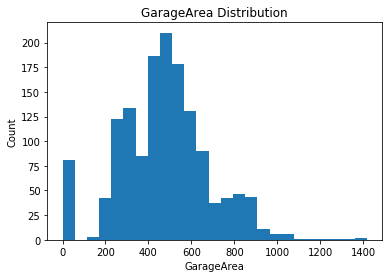

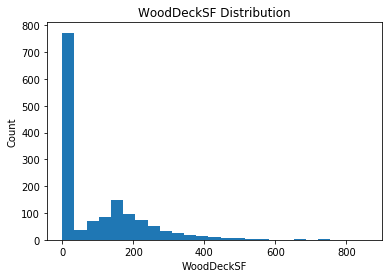

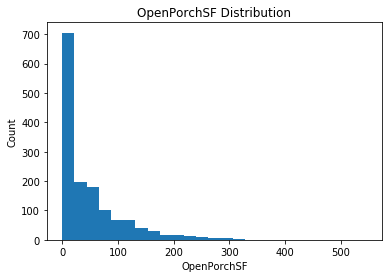

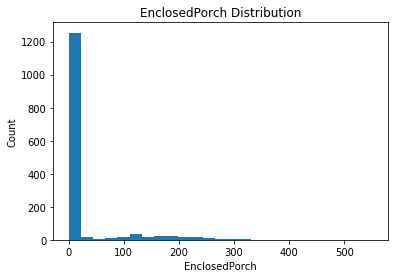

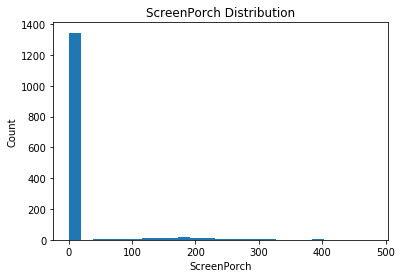

In [132]:
for feature in continuous_features: 
    plt.hist(df[feature], bins = 25)
    plt.title(feature + " Distribution")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()

**Observations**
- We see that a number of plots show a significant variation in the sales price with respect to the NAN values. Hence, carefully exploring the fix to this NAN value problem is required.
- We see that with the average house price has decreased over the last few years. 
- We see that for a house, on average, its price decreases with an increase in it's age, an increase in the number of years since the last remodelling, and an increase in it's garage's age 
- One of the most obvious correlations we see that the sales price increases with an increase in overall quality score.
- There are trivial relations between the house pricing and a lot of features. An open porch sells for on average higher than the closed porch.
- Unfinished basement areas don't affect the house prices as much, same goes for finished Type 2 basement areas.
- Pretty much all of the features have higher occurences on the lower end of their spectrum. This could pose problems while training ML models. 

After checking the dependency of sales price on various features, lets check the distribution of sales price as well.

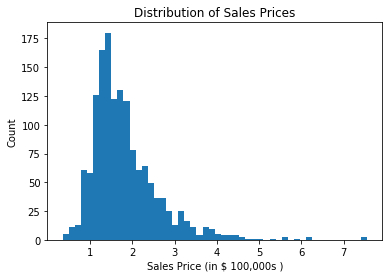

In [133]:
plt.hist(df["SalePrice"], bins = 50)
plt.title("Distribution of Sales Prices")
plt.xlabel("Sales Price (in $ 100,000s )")
plt.ylabel("Count")
plt.xticks([100000,200000,300000,400000,500000,600000,700000],[1,2,3,4,5,6,7])
plt.show()

**Observations**
- We see that a number of plots show a significant variation in the sales price with respect to the NAN values. Hence, carefully exploring the fix to this NAN value problem is required.
- We see that with the average house price has decreased over the last few years. 
- We see that for a house, on average, its price decreases with an increase in it's age, an increase in the number of years since the last remodelling, and an increase in it's garage's age 
- One of the most obvious correlations we see that the sales price increases with an increase in overall quality score.
- There are trivial relations between the house pricing and a lot of features. An open porch sells for on average higher than the closed porch.
- Unfinished basement areas don't affect the house prices as much, same goes for finished Type 2 basement areas.
- Pretty much all of the features have higher occurences on the lower end of their spectrum. This could pose problems while training ML models. 
- We see skewed distribution for the Sales Price. This means that we have more data for a certain range of house prices and less for another certain range. Training ML models on skewed data can give incorrect results. 

**TO DO LIST :**
- [ ] Fix the missing values with careful numerical precision
- [ ] Remove the id column
- [ ] Get to a normal distribution for continuous numerical variables.

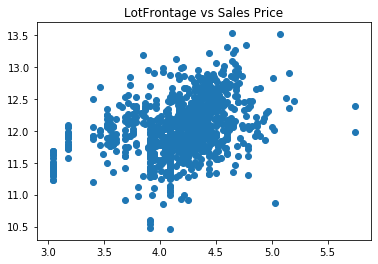

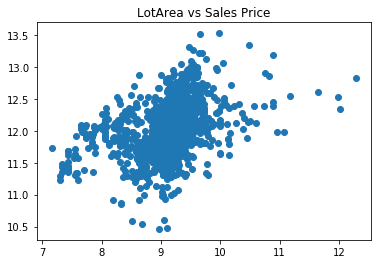

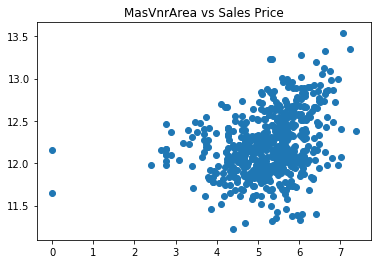

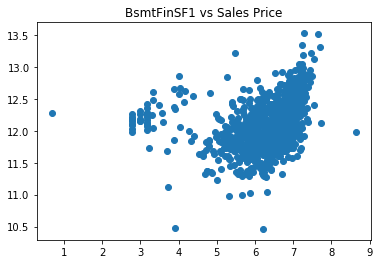

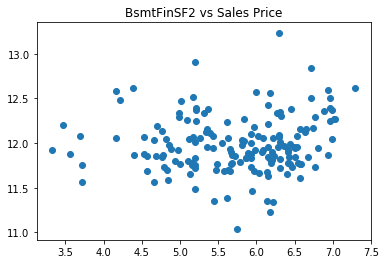

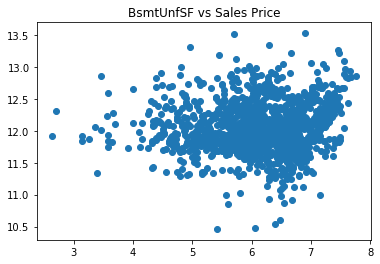

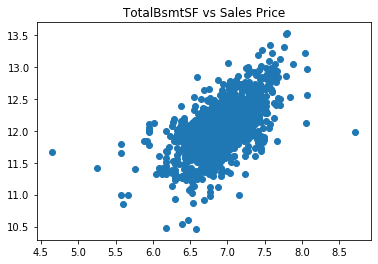

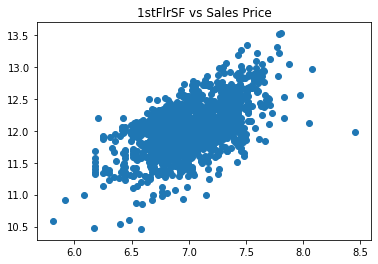

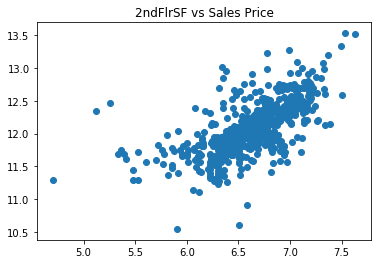

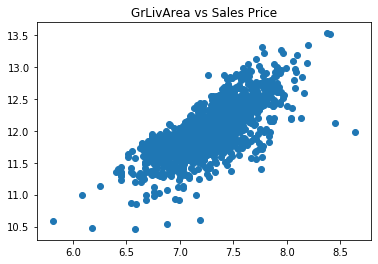

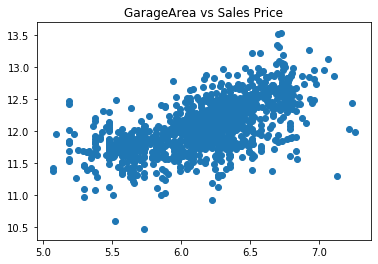

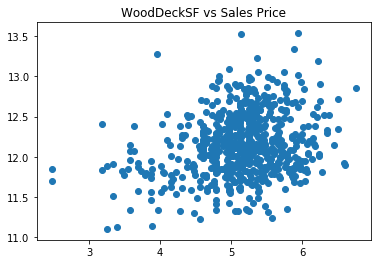

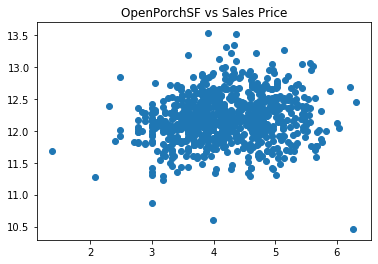

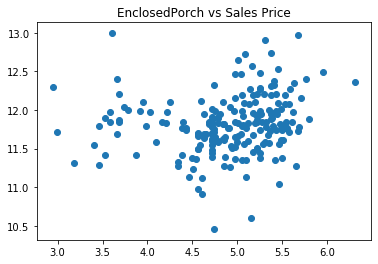

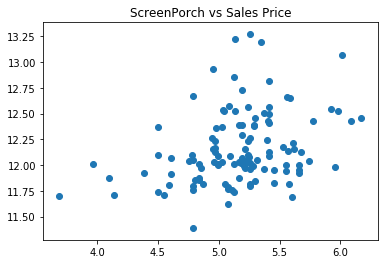

In [134]:
#PLotting the data log normally distributed data with log normally distributed sales price. 
for feature in continuous_features: 
    plt.scatter(np.log(df[feature]),np.log(df["SalePrice"]))
    plt.title(feature + " vs Sales Price")
    plt.show()

We have confirmed our assertion of trivial relations where we see a number of features having a positive correlation with Sales Price.

In [135]:
#Removing ID column
df = df.drop(["Id"], 1)

**TO DO LIST :**
- [ ] Fix the missing values with careful numerical precision
- [x] Remove the id column
- [ ] Get to a normal distribution for continuous numerical variables.

# Categorical Variables

In [136]:
categorical_features = [feature for feature in df.columns if feature not in numerical_features + ["SalePrice"]]
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [137]:
for feature in categorical_features:
    print(feature, len(df[feature].unique()))

MSZoning 5
Street 2
Alley 3
LotShape 4
LandContour 4
Utilities 2
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 8
BldgType 5
HouseStyle 8
RoofStyle 6
RoofMatl 8
Exterior1st 15
Exterior2nd 16
MasVnrType 5
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 5
BsmtCond 5
BsmtExposure 5
BsmtFinType1 7
BsmtFinType2 7
Heating 6
HeatingQC 5
CentralAir 2
Electrical 6
KitchenQual 4
Functional 7
FireplaceQu 6
GarageType 7
GarageFinish 4
GarageQual 6
GarageCond 6
PavedDrive 3
PoolQC 4
Fence 5
MiscFeature 5
SaleType 9
SaleCondition 6


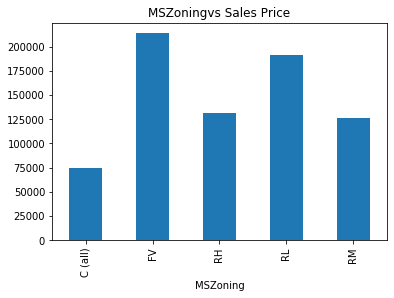

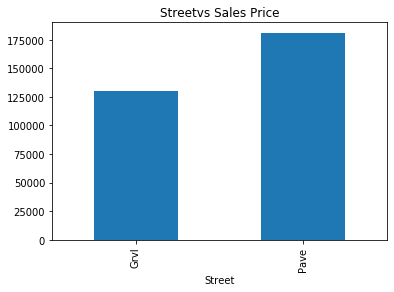

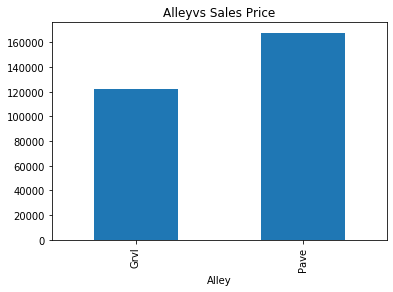

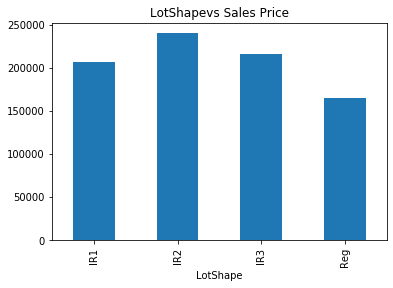

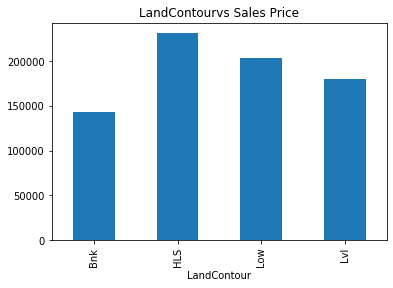

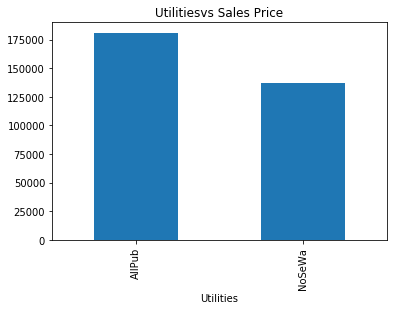

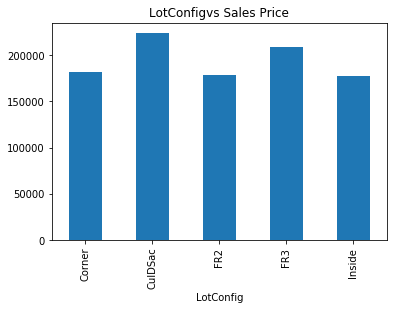

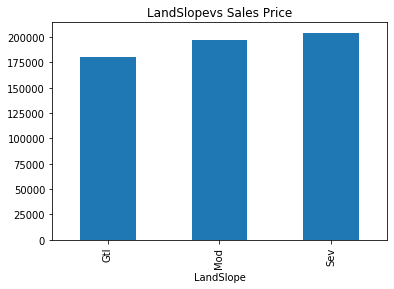

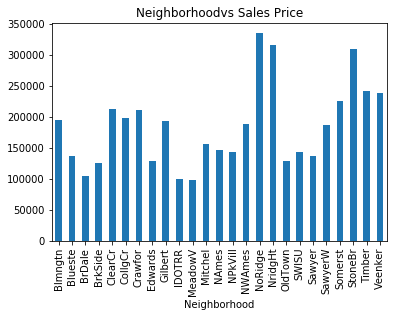

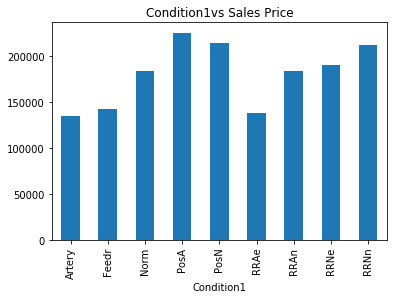

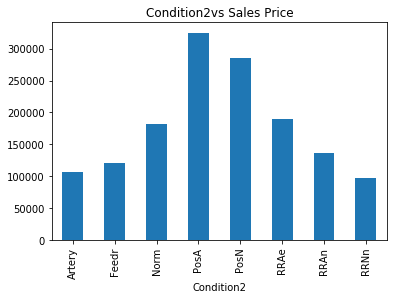

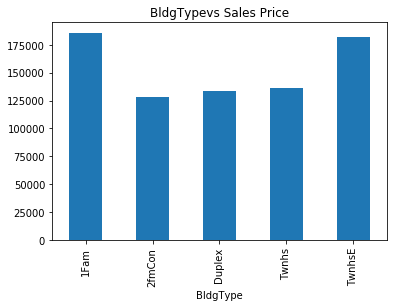

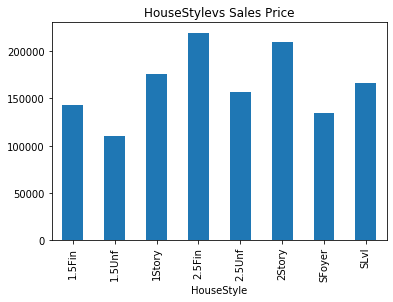

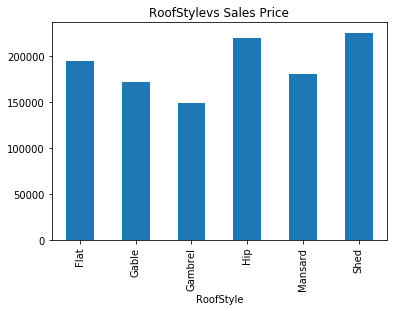

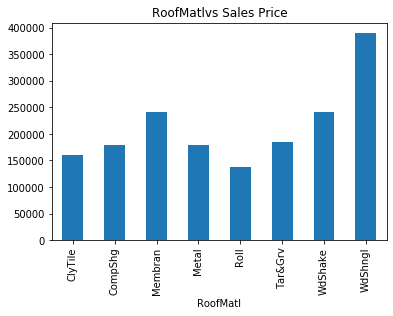

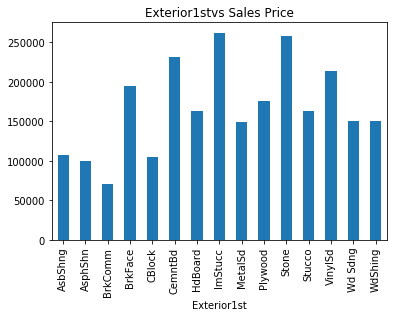

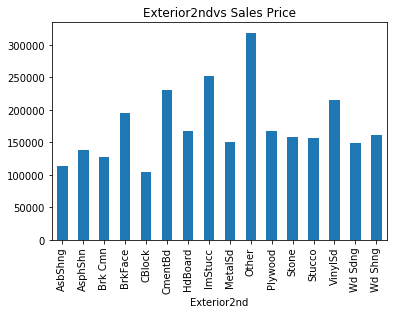

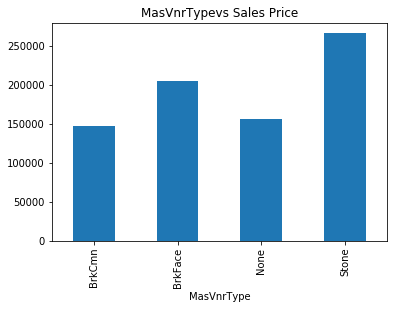

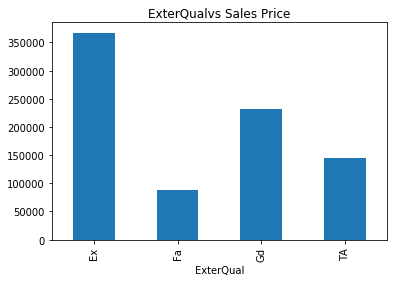

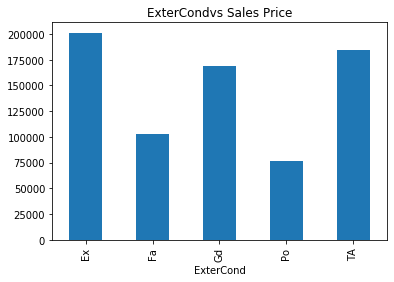

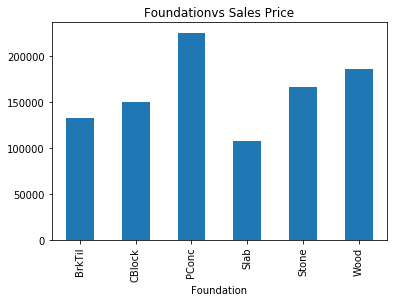

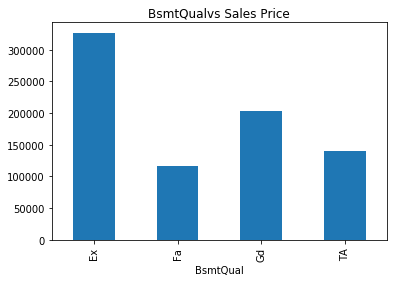

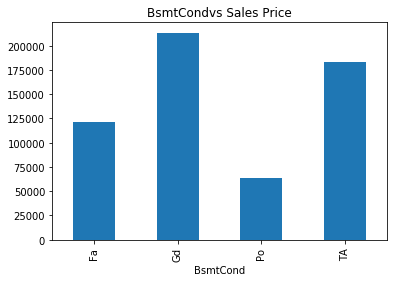

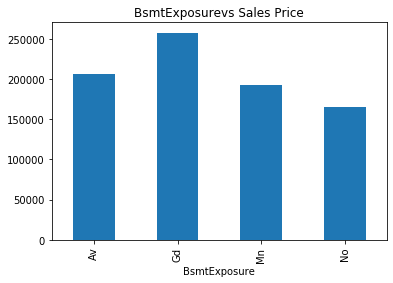

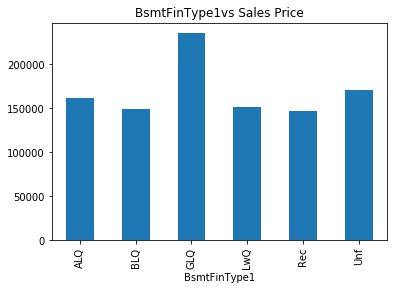

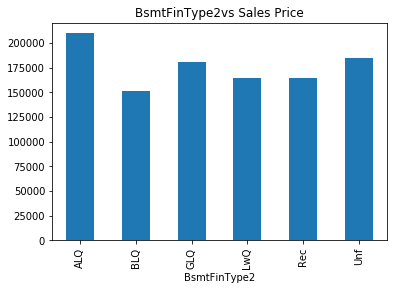

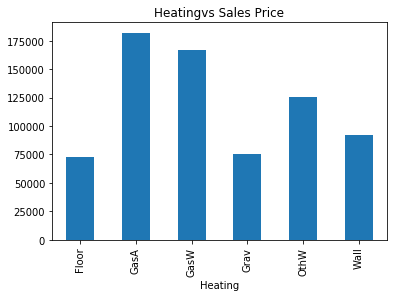

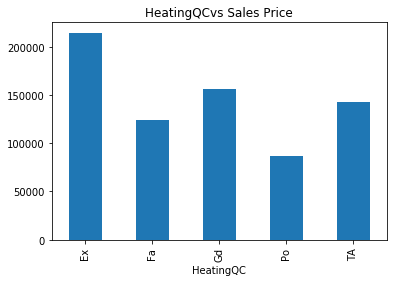

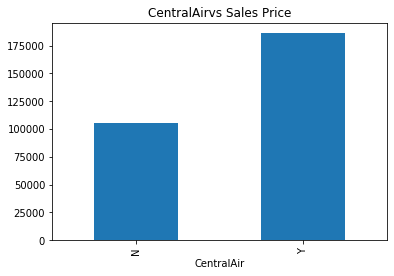

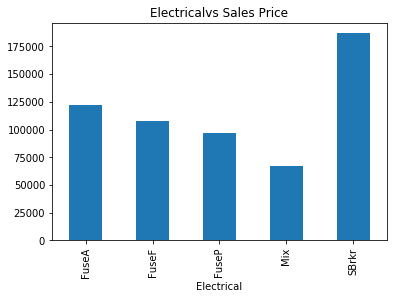

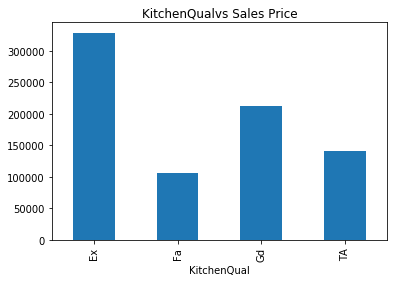

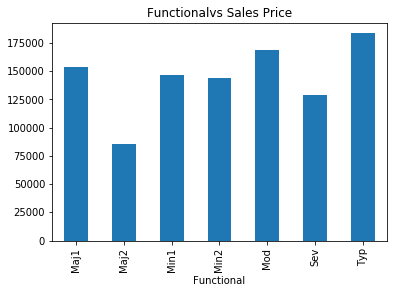

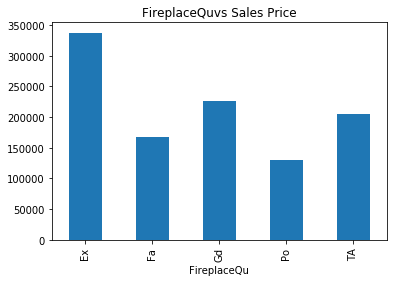

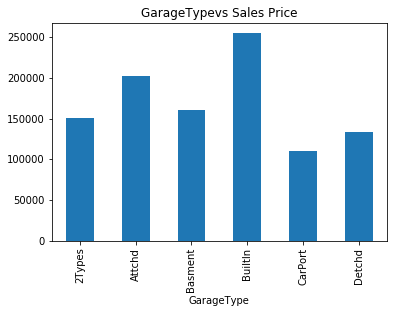

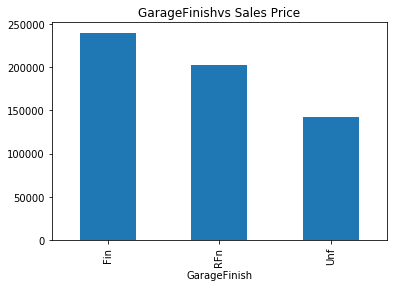

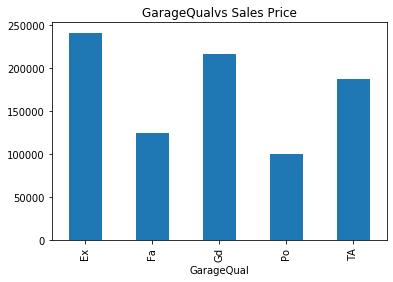

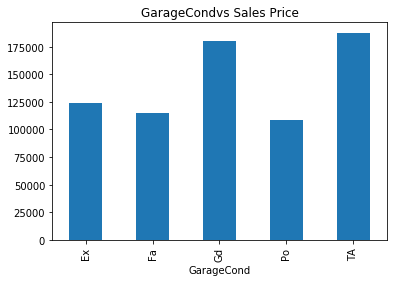

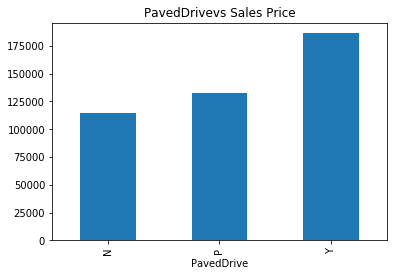

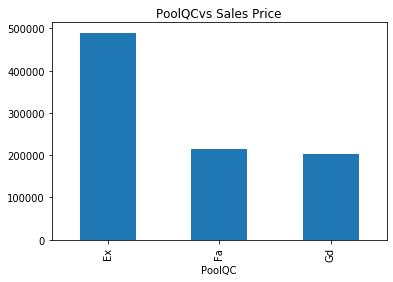

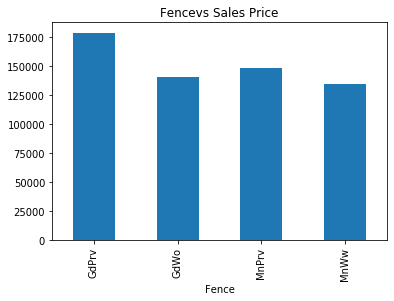

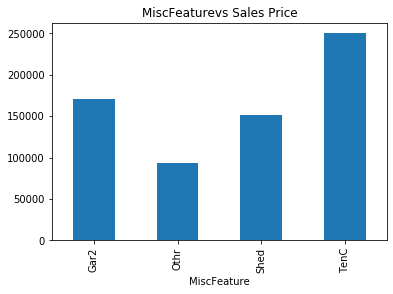

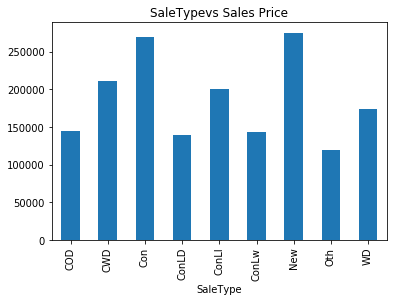

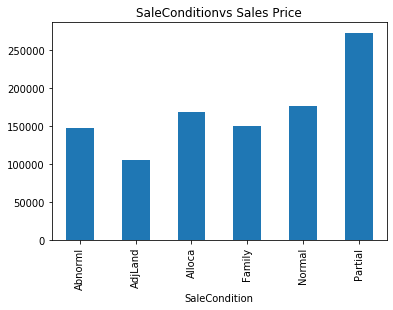

In [138]:
for feature in categorical_features:
    df.groupby(feature)["SalePrice"].mean().plot.bar()
    plt.title(feature + "vs Sales Price")
    plt.show()

Here, the we map the categorical features with the mean sales price and see how sales price vary with different categories.

### Fixing features with Null Values

First we see the features with the nan values.

In [139]:
features_with_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

Breaking these features into **categorical** and **numerical**

In [140]:
categorical_features_na = [feature for feature in features_with_na if feature in categorical_features]
numerical_features_na = [feature for feature in features_with_na if feature in numerical_features]

In [141]:
categorical_features_na

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [142]:
numerical_features_na

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [143]:
print(len(features_with_na)) 
print(len(numerical_features_na) + len(categorical_features_na))

18
18


For categorical values, we replace **NAN** values with **"Missing"**

In [144]:
df[categorical_features_na] = df[categorical_features_na].fillna("Missing")

In [145]:
df[categorical_features_na]

,Alley,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,Missing,BrkFace,Gd,TA,No,GLQ,Unf,Missing,Attchd,RFn,TA,TA,Missing,Missing,Missing
1,Missing,None,Gd,TA,Gd,ALQ,Unf,TA,Attchd,RFn,TA,TA,Missing,Missing,Missing
2,Missing,BrkFace,Gd,TA,Mn,GLQ,Unf,TA,Attchd,RFn,TA,TA,Missing,Missing,Missing
3,Missing,None,TA,Gd,No,ALQ,Unf,Gd,Detchd,Unf,TA,TA,Missing,Missing,Missing
4,Missing,BrkFace,Gd,TA,Av,GLQ,Unf,TA,Attchd,RFn,TA,TA,Missing,Missing,Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Missing,None,Gd,TA,No,Unf,Unf,TA,Attchd,RFn,TA,TA,Missing,Missing,Missing
1456,Missing,Stone,Gd,TA,No,ALQ,Rec,TA,Attchd,Unf,TA,TA,Missing,MnPrv,Missing
1457,Missing,None,TA,Gd,No,GLQ,Unf,Gd,Attchd,RFn,TA,TA,Missing,GdPrv,Shed
1458,Missing,None,TA,TA,Mn,GLQ,Rec,Missing,Attchd,Unf,TA,TA,Missing,Missing,Missing


For numerical values, we replace **NAN** with the **median**.
Before that, we also keep track of the values we are replacing, hence, we add a boolean column to our dataset, which tells us if that observation is missing or not.

We manually check if all the numerical variables containing na are continuous, if thats the case, we replace the nans with the median.



In [146]:
for feature in numerical_features_na:
    print(len(df[feature].unique()))

# All values are greater than 25, hence we shall consider them to be continuous and replace the values with the median.

111
328
98


In [147]:
for feature in numerical_features_na:
    df[feature + "nan"]  = df[feature].isnull()
    df[feature].fillna(df[feature].median()) 

In [148]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500,False,False,False
1,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500,False,False,False
2,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500,False,False,False
3,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000,False,False,False
4,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,Missing,Missing,Missing,0,8,2007,WD,Normal,175000,False,False,False
1456,20,RL,85.0,13175,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,Missing,MnPrv,Missing,0,2,2010,WD,Normal,210000,False,False,False
1457,70,RL,66.0,9042,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941

Finally, for temporal variables, we shall calculate the amount of years since the mentioned event. For example, we shall calculate the age by calculating the amount of years since house was built.

In [149]:
temporal_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [150]:
for feature in temporal_features:
    if feature != "YrSold":
        df[feature] = df["YrSold"] - df[feature]

In [151]:
df[temporal_features]

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,5,5,5.0,2008
1,31,31,31.0,2007
2,7,6,7.0,2008
3,91,36,8.0,2006
4,8,8,8.0,2008
...,...,...,...,...
1455,8,7,8.0,2007
1456,32,22,32.0,2010
1457,69,4,69.0,2010
1458,60,14,60.0,2010


**TO DO LIST :**
- [x] Fix the missing values with careful numerical precision
- [x] Remove the id column
- [ ] Get to a normal distribution for continuous numerical variables.
- [x] Fix the categorical values, replace them with missing. 
- [x] For temporal variables, calculate the amount of years since the event.
- [x] Find relationships between the data. 

**Observations**
- We see that a number of plots show a significant variation in the sales price with respect to the NAN values. Hence, carefully exploring the fix to this NAN value problem is required.
- We see that with the average house price has decreased over the last few years. 
- We see that for a house, on average, its price decreases with an increase in it's age, an increase in the number of years since the last remodelling, and an increase in it's garage's age 
- One of the most obvious correlations we see that the sales price increases with an increase in overall quality score.
- There are trivial relations between the house pricing and a lot of features. An open porch sells for on average higher than the closed porch.
- Unfinished basement areas don't affect the house prices as much, same goes for finished Type 2 basement areas.
- Pretty much all of the features have higher occurences on the lower end of their spectrum. This could pose problems while training ML models. 
- We see skewed distribution for the Sales Price. This means that we have more data for a certain range of house prices and less for another range. Training ML models on skewed data can give incorrect results. 

**The final objective hasn't been reached yet. We need to the skewed distributions of our continuous numerical variables as well, because a normal distribution can train an ML model better.**

**TO DO LIST :**
- [x] Fix the missing values with careful numerical precision
- [x] Remove the id column
- [ ] Get to a normal distribution for continuous numerical variables.
- [x] Fix the categorical values, replace them with missing. 
- [x] For temporal variables, calculate the amount of years since the event.
- [x] Find relationships between the data.  

In [152]:
# To get to a log normal distribution we need to keep in mind that this will only be possible for features not containing 
# the value 0, as log(0)->infinity.
# Removing the extra id feature from numerical_features
numerical_features.remove("Id")

In [157]:
num_features_w_zero = [feature for feature in numerical_features if 0 not in df[feature].unique()]

In [158]:
num_features_w_zero

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 '1stFlrSF',
 'GrLivArea',
 'TotRmsAbvGrd',
 'MoSold',
 'YrSold',
 'SalePrice']

Now checking the distribution of these values.

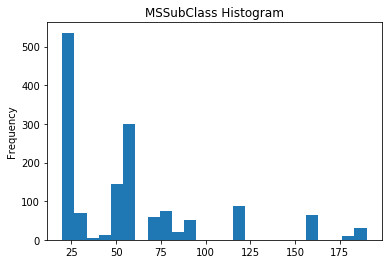

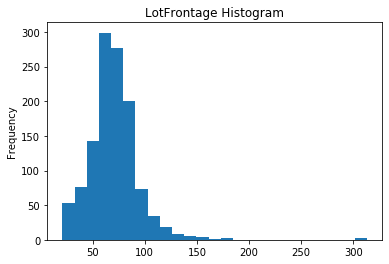

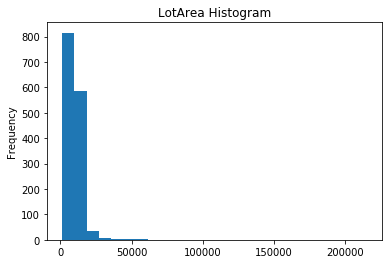

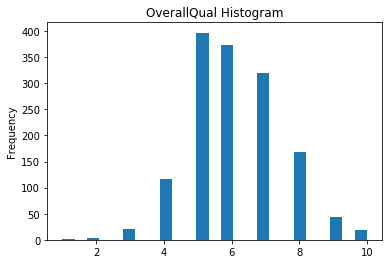

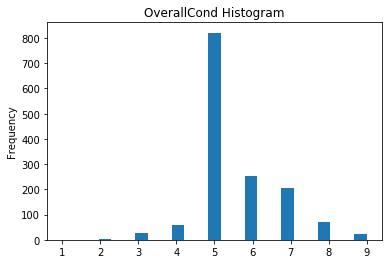

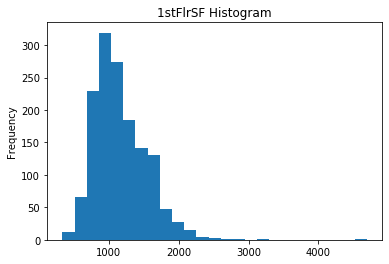

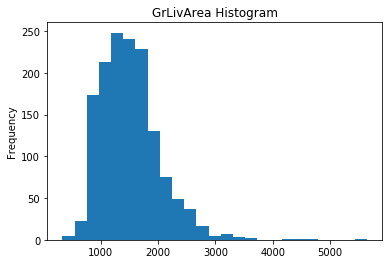

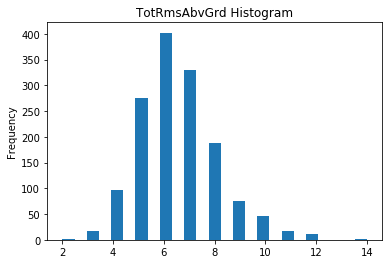

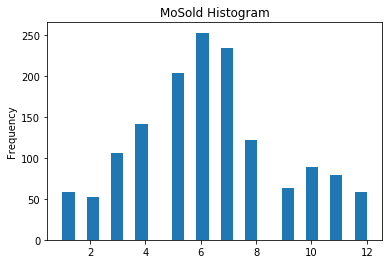

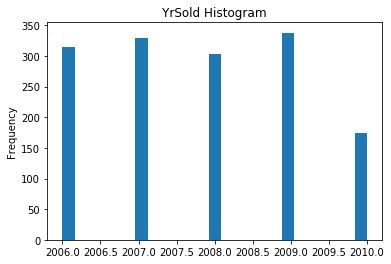

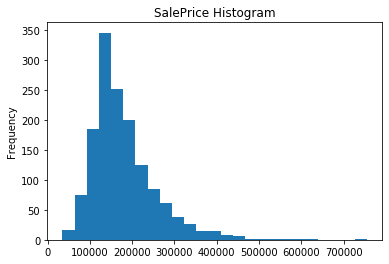

In [161]:
for feature in num_features_w_zero:
    df[feature].plot.hist(bins = 25)
    plt.title(feature + " Histogram")
    plt.show()

We see that some of them are discrete in nature, hence we need to get rid of them as well.

In [170]:
x

['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

In [167]:
for feature in num_features_w_zero:
    if feature in discrete_features:
        num_features_w_zero.remove(feature)

In [168]:
num_features_w_zero

['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'YrSold', 'SalePrice']

As YrSold is a temporal variable, and discrete in nature, that is why we don't change its distribution and hence, we remove it from the list. It stayed in the list because when we created the discrete variable list, we did not include the temporal variables.

In [169]:
num_features_w_zero.remove("YrSold")

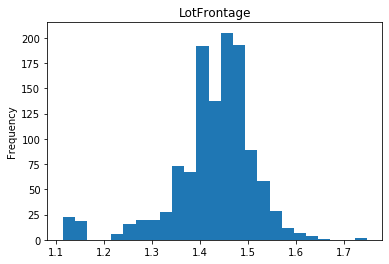

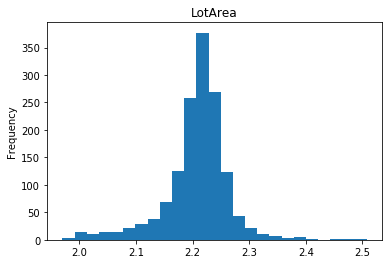

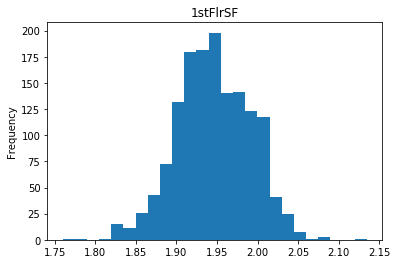

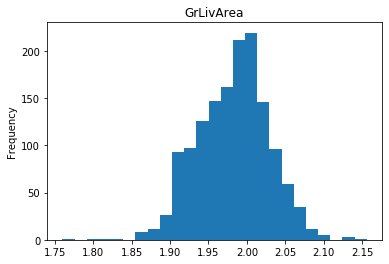

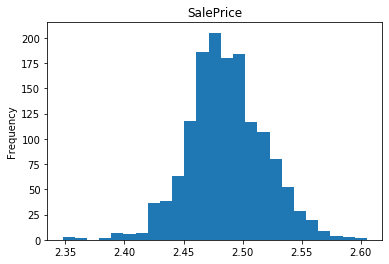

In [173]:
# Applying log normal distribution to these features. 

for feature in num_features_w_zero:
    df[feature] = np.log(df[feature])
    df[feature].plot.hist(bins = 25)
    plt.title(feature)
    plt.show()

Clearly the distribution looks normal now.

**Observations**
- We see that a number of plots show a significant variation in the sales price with respect to the NAN values. Hence, carefully exploring the fix to this NAN value problem is required.
- We see that with the average house price has decreased over the last few years. 
- We see that for a house, on average, its price decreases with an increase in it's age, an increase in the number of years since the last remodelling, and an increase in it's garage's age 
- One of the most obvious correlations we see that the sales price increases with an increase in overall quality score.
- There are trivial relations between the house pricing and a lot of features. An open porch sells for on average higher than the closed porch.
- Unfinished basement areas don't affect the house prices as much, same goes for finished Type 2 basement areas.
- Pretty much all of the features have higher occurences on the lower end of their spectrum. This could pose problems while training ML models. 
- We see skewed distribution for the Sales Price. This means that we have more data for a certain range of house prices and less for another range. Training ML models on skewed data can give incorrect results. 

**TO DO LIST :**
- [x] Fix the missing values with careful numerical precision
- [x] Remove the id column
- [x] Get to a normal distribution for continuous numerical variables.
- [x] Fix the categorical nan values, replace them with missing. 
- [x] For temporal variables, calculate the amount of years since the event.
- [x] Find relationships between the data.  

## Thank You 